<font size="1">  
<h1>Subject: Home Work 2<h1>
    <p>Shahrood University of Technology (SUT)<p>
    <p> Artificial Intelligence</p>
    <p> Student Number: 40103834 </p>
    <p style="color:yellow;">Author: Ehsan Paydar</p> 
    </font>  

<h1 style="color:#a21441;">import library</h1>


In [3]:
from sklearn.datasets import fetch_openml 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neural_network import MLPClassifier 
import matplotlib.pyplot as plt 

<h1 style="color:#a21441;">Load the data from the MNIST dataset </h1>

In [5]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True , parser='auto') 


<h1 style="color:#a21441;">Split the data into training and testing datasets  </h1>

In [8]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

<h1 style="color:#a21441;"> Scale the data so that it has zero mean and unit variance </h1>


In [9]:
scaler = StandardScaler() 
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.fit_transform(x_test) 


<h1 style="color:#a21441;"> Create a Multi Layer Perceptron neural network classifier </h1>


In [10]:
mlp_clf = MLPClassifier(random_state=0) 

<h1 style="color:#a21441;"> Define parameters to search for in grid search </h1>


In [11]:
parameters = { 
	'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)], 
	'activation': ['logistic'], 
	'solver': ['sgd'], 
	'learning_rate': ['constant'], 
	'learning_rate_init': [0.1], 
	'max_iter':[1000] 
 }


<h1 style="color:#a21441;"> Create a GridSearchCV object using 5-fold cross validation </h1>


In [12]:
grid_search = GridSearchCV(mlp_clf, param_grid=parameters, cv=5,verbose=1) 

<h1 style="color:#a21441;"> Fit the model to the training data </h1>


In [13]:
grid_search.fit(x_train_scaled, y_train) 


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [(50, 50, 50), (100, 100, 100),
                                                (150, 150, 150)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.1], 'max_iter': [1000],
                         'solver': ['sgd']},
             verbose=1)

<h1 style="color:#a21441;"> Plot the training errors with different numbers of hidden layers </h1>


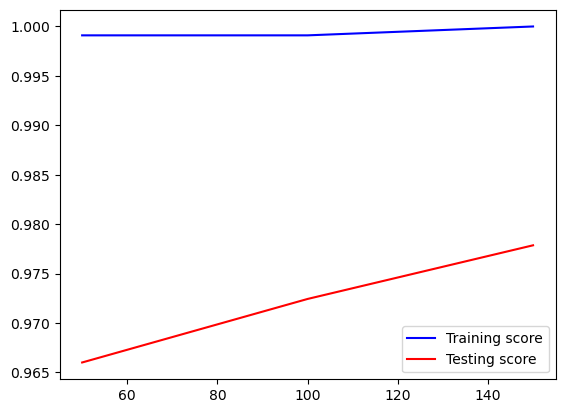

In [14]:
training_scores = []
testing_scores = []
hidden_layers = [50, 100, 150]
for i in hidden_layers: 
	params = {'hidden_layer_sizes':(i,i,i)} 
	mlp_clf.set_params(**params) 
	mlp_clf.fit(x_train_scaled, y_train) 
	training_score = mlp_clf.score(x_train_scaled, y_train) 
	testing_score = mlp_clf.score(x_test_scaled, y_test) 
	training_scores.append(training_score) 
	testing_scores.append(testing_score) 
	
plt.plot(hidden_layers, training_scores, color='blue', label='Training score') 
plt.plot(hidden_layers, testing_scores, color='red', label='Testing score') 
plt.legend(loc=4) 
plt.show()

<h1 style="color:#a21441;"> Drawing a diagram of the convergence process of the model (changes in the training error during successive iterations of the algorithm) </h1>


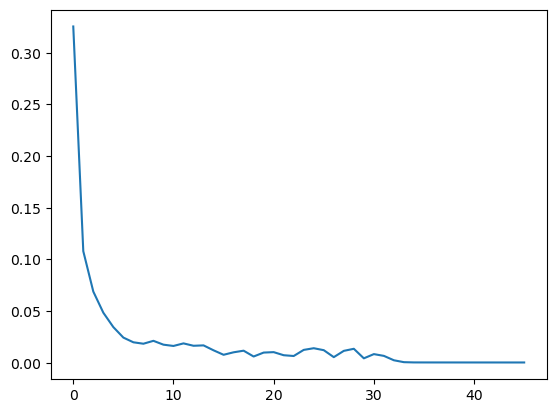

In [15]:
train_errors = mlp_clf.loss_curve_
plt.plot(train_errors)
plt.show()